In [1]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

from glob import glob
import datetime
matplotlib.rcParams['figure.dpi'] = 120

In [91]:
def read_time_tuples(filenames):

    time_tuples = []
    for filename in filenames:
        f = open(filename)

        start_string = f.readline()
        end_string = f.readline()
        
        if len(start_string) < 5 or len(end_string) < 5:
            continue
            
        start_time = datetime.datetime.strptime(start_string.split(' ')[1].strip(), "%Y-%m-%dT%H:%M:%S.%f")

        end_time = datetime.datetime.strptime(end_string.split(' ')[1].strip(), "%Y-%m-%dT%H:%M:%S.%f")
        time_tuples.append( (start_time, end_time) )
        f.close()

    time_tuples.sort(key=lambda x: x[0])
    
    return time_tuples

noconductor_time_tuples = read_time_tuples(glob("no_conductor_*.dat"))
conductor_time_tuples = read_time_tuples(glob("conductor_*.dat"))


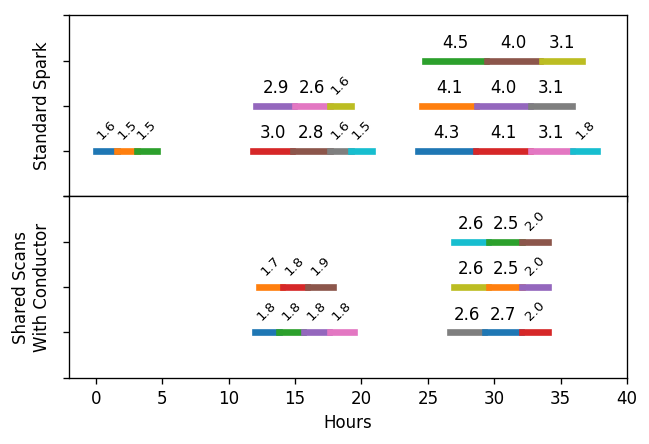

In [84]:
#sorted_tuples = sort()

plt.subplot(2,1,1)

min_time = noconductor_time_tuples[0][0]
slot_ends = {}
for start_time, end_time in noconductor_time_tuples:
    
    start = (start_time - min_time).total_seconds()/3600.0
    end = (end_time - min_time).total_seconds()/3600.0
    
    for slot_n in range(0, 20):
        if slot_n not in slot_ends.keys() or slot_ends[slot_n] < start_time:
            slot_ends[slot_n] = end_time
            break

    font_size = 8 if (end - start) < 2 else 10
    rotation = 45 if (end - start) < 2 else 0    
    y_level = slot_n + 1
    plt.plot([start, end], [y_level, y_level], '-', lw=4)
    plt.text(0.5*(start + end), y_level + 0.2, "{:.1f}".format(end - start),
             horizontalalignment="center", verticalalignment="bottom",
            fontsize=font_size, rotation=rotation)

plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel("Standard Spark")
plt.ylim(-0, 4)
plt.xlim(-2, 40)

plt.subplot(2,1,2)

slot_ends = {}
min_time = conductor_time_tuples[0][0] - datetime.timedelta(hours=12)
for start_time, end_time in conductor_time_tuples:
    
    start = (start_time - min_time).total_seconds()/3600.0
    end = (end_time - min_time).total_seconds()/3600.0
    
    for slot_n in range(0, 20):
        if slot_n not in slot_ends.keys() or slot_ends[slot_n] < start_time:
            slot_ends[slot_n] = end_time
            break

    font_size = 8 if (end - start) < 2 else 10
    rotation = 45 if (end - start) < 2 else 0
    y_level = slot_n
    plt.plot([start, end], [y_level, y_level], '-', lw=4)
    plt.text(0.5*(start + end), y_level + 0.2, "{:.1f}".format(end - start),
             horizontalalignment="center", verticalalignment="bottom",
            fontsize=font_size, rotation=rotation)

    
#wiggle_texts(plt.gca())

plt.xlabel("Hours")
plt.ylabel("Shared Scans\nWith Conductor")
plt.ylim(-1, 3)
plt.gca().yaxis.set_ticklabels([])
plt.xlim(-2, 40)

plt.subplots_adjust(hspace=0)
#plt.gca().yaxis.set_major_ticks([])

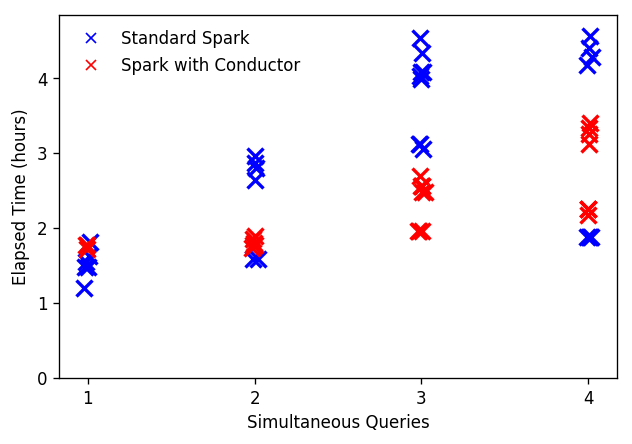

In [92]:
for task_n, (start_time, end_time) in enumerate(noconductor_time_tuples):
    task_duration = end_time - start_time
    simultaneous_procs = 1
    for test_n, (test_start, test_end) in enumerate(noconductor_time_tuples):
        if test_n == task_n:
            continue
        overlap_duration = min(end_time, test_end) - max(start_time, test_start)

        if overlap_duration > 0.5*(task_duration):
            simultaneous_procs += 1
            
    task_hours = task_duration.total_seconds()/3600.0
    plt.plot(simultaneous_procs + 0.01*np.random.randn(), task_hours, 'bx', mew=2, markersize=10)

for task_n, (start_time, end_time) in enumerate(conductor_time_tuples):
    task_duration = end_time - start_time
    simultaneous_procs = 1
    for test_n, (test_start, test_end) in enumerate(conductor_time_tuples):
        if test_n == task_n:
            continue
        overlap_duration = min(end_time, test_end) - max(start_time, test_start)

        if overlap_duration > 0.5*(task_duration):
            simultaneous_procs += 1
            
    task_hours = task_duration.total_seconds()/3600.0
    plt.plot(simultaneous_procs + 0.01*np.random.randn(), task_hours, 'rx', mew=2, markersize=10)

    
plt.plot(1, -1, 'bx', label="Standard Spark")
plt.plot(1, -1, 'rx', label="Spark with Conductor")
plt.legend(frameon=False, numpoints=1)

plt.ylim(ymin=0)

plt.gca().xaxis.set_major_locator(FixedLocator([1,2,3,4]))
plt.ylabel("Elapsed Time (hours)")
plt.xlabel("Simultaneous Queries")

(datetime.datetime(2017, 11, 9, 19, 52, 16, 582646), datetime.datetime(2017, 11, 9, 22, 33, 35, 992984))
(datetime.datetime(2017, 11, 9, 20, 8, 42, 630335), datetime.datetime(2017, 11, 9, 22, 37, 33, 217552))
(datetime.datetime(2017, 11, 9, 20, 8, 42, 630367), datetime.datetime(2017, 11, 9, 22, 37, 33, 281876))
(datetime.datetime(2017, 11, 9, 22, 37, 34, 380976), datetime.datetime(2017, 11, 10, 0, 34, 53, 290955))
(datetime.datetime(2017, 11, 9, 22, 37, 37, 805466), datetime.datetime(2017, 11, 10, 0, 34, 53, 290897))
(datetime.datetime(2017, 11, 9, 22, 37, 37, 806989), datetime.datetime(2017, 11, 10, 0, 34, 53, 290938))


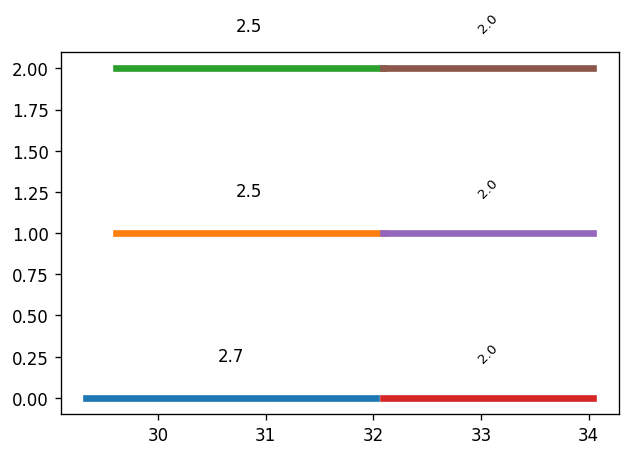

In [87]:
min_time = conductor_time_tuples[0][0] - datetime.timedelta(hours=12)
slot_ends = {}
for start_time, end_time in conductor_time_tuples:
    duration = (end_time - start_time).total_seconds()/3600.0
    if duration < 1.9:
        continue
        
    start = (start_time - min_time).total_seconds()/3600.0
    end = (end_time - min_time).total_seconds()/3600.0
    
    if start < 28:
        continue
        
    for slot_n in range(0, 20):
        if slot_n not in slot_ends.keys() or slot_ends[slot_n] < start_time:
            slot_ends[slot_n] = end_time
            break

    font_size = 8 if (end - start) < 2 else 10
    rotation = 45 if (end - start) < 2 else 0
    y_level = slot_n
    plt.plot([start, end], [y_level, y_level], '-', lw=4)
    plt.text(0.5*(start + end), y_level + 0.2, "{:.1f}".format(end - start),
             horizontalalignment="center", verticalalignment="bottom",
            fontsize=font_size, rotation=rotation) 
    print((start_time, end_time))